In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
dftest= pd.read_csv('test.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## EDA

Checking columns that contain null values

In [6]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

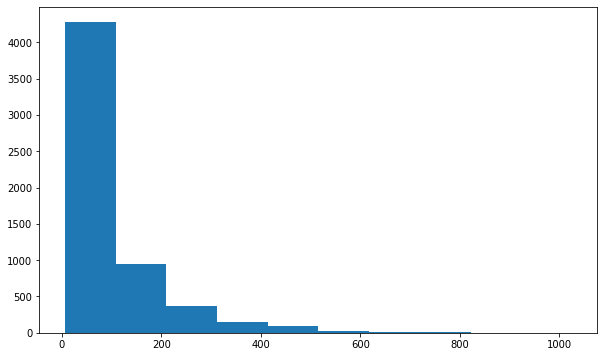

In [39]:
f, ax = plt.subplots(figsize=(10,6)) 
plt.hist(df['User_ID'].value_counts(), bins=10);

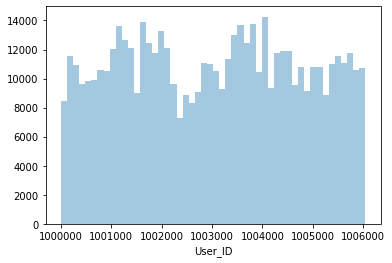

In [41]:
sns.distplot(a=df.User_ID, kde=False)

In [7]:
temp = np.array_split(df,2)[0]

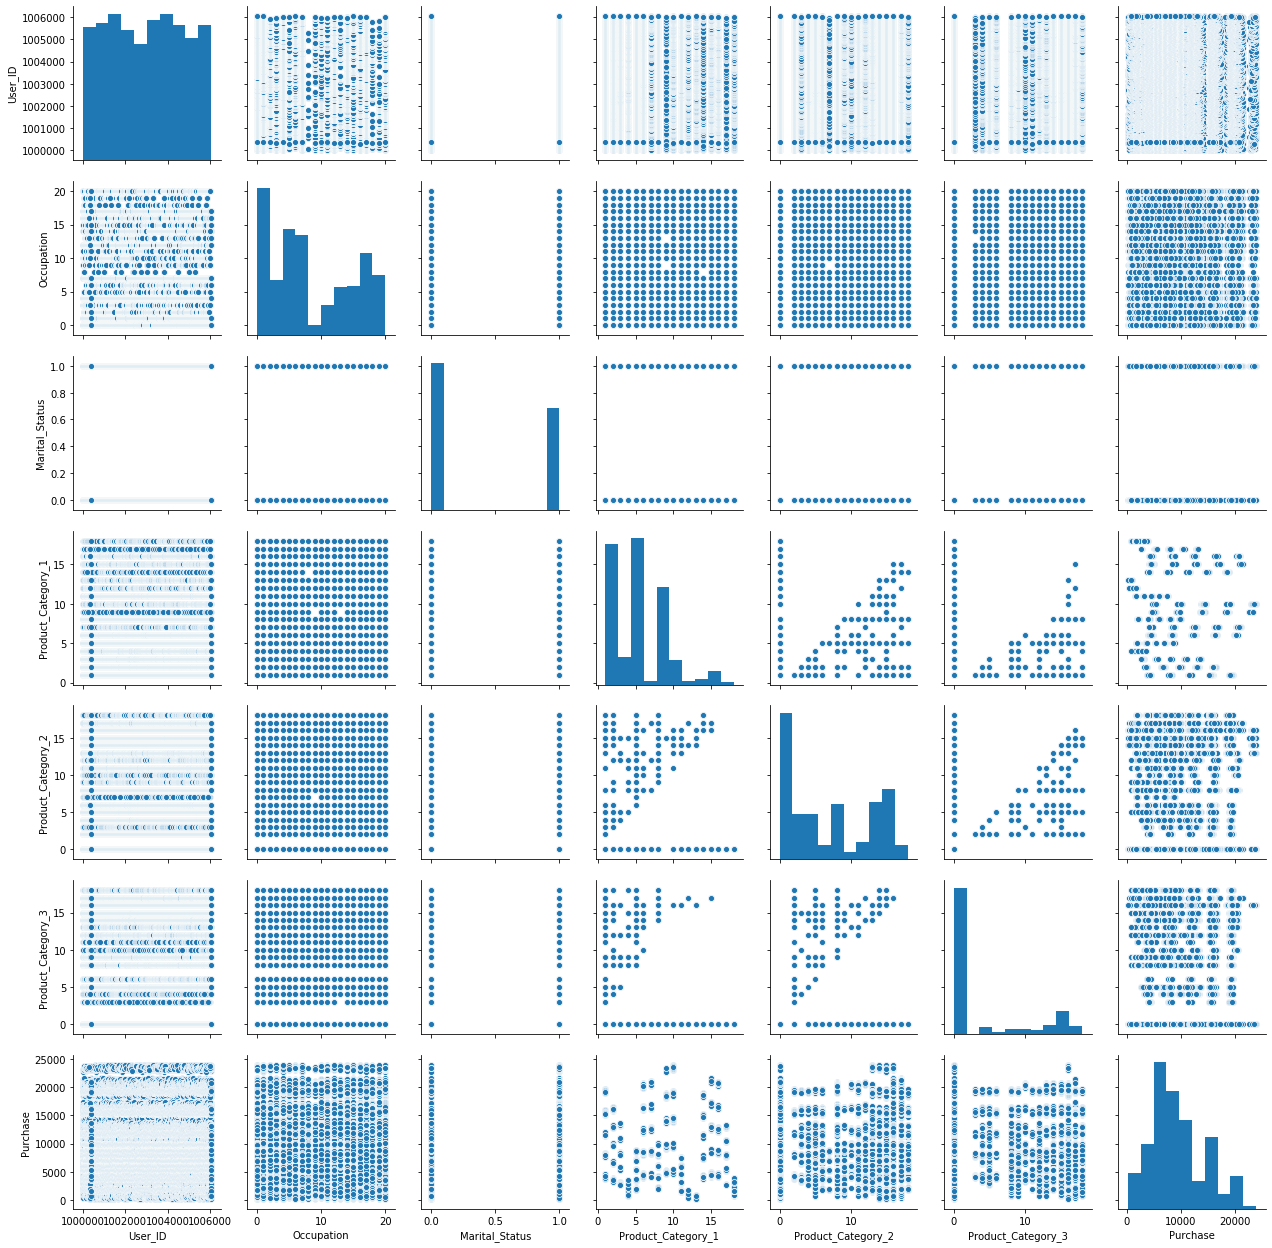

In [53]:
sns.pairplot(temp.fillna(value=0))

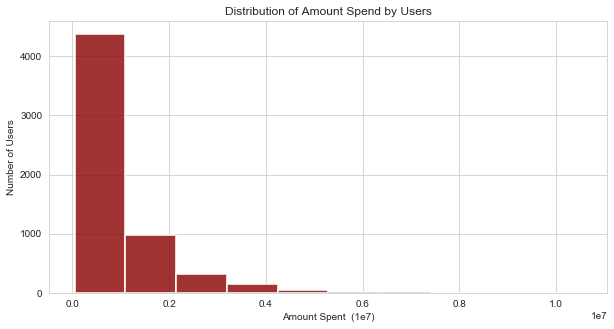

In [70]:
f, x = plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(df.groupby(by=df['User_ID'])['Purchase'].agg(np.sum), kde=False, bins=10, 
            hist_kws={"histtype": "barstacked", "linewidth": 2, "alpha": 0.8, "color": "darkred"}, 
             axlabel = 'Amount Spent  (1e7)').set_title('Distribution of Amount Spend by Users')
x.set(ylabel='Number of Users');

### Gender Analysis

In [7]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object

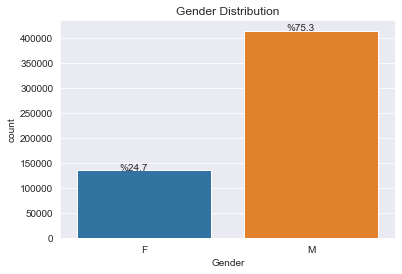

In [26]:
sns.set_style('darkgrid')
ax= sns.countplot(df['Gender'])
ax.set_title('Gender Distribution');
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/550068*100), (p.get_x()+0.25, p.get_height()+200))

[Text(0.5, 1.0, 'Percentage Distribution of Purchase by Gender')]

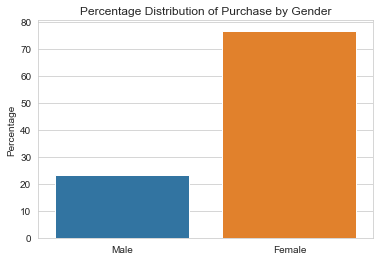

In [28]:
sns.set_style('whitegrid')
gend = df.groupby(by=df['Gender'])['Purchase'].agg(np.sum)
sns.barplot(y=(gend[0]/gend.sum()*100,gend[1]/gend.sum()*100), x=['Male', 'Female'])
x1 = plt.gca()
x1.set(ylabel='Percentage');
x1.set(title='Percentage Distribution of Purchase by Gender')

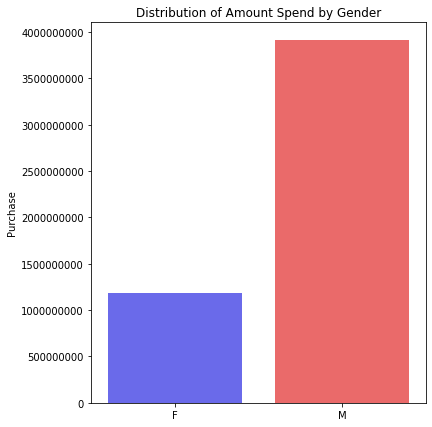

In [47]:
f, x = plt.subplots(figsize=(6,7))
sns.barplot(y=df.groupby(by=df['Gender'])['Purchase'].agg(np.sum), x = df['Gender'].unique(), palette='seismic',
          alpha=1).set_title('Distribution of Amount Spend by Gender')
plt.ticklabel_format(style='plain', axis='y') # to avoid scientific notation i.e. exponents

Text(0.5, 1.0, 'Distribution of Amount Spend by City')

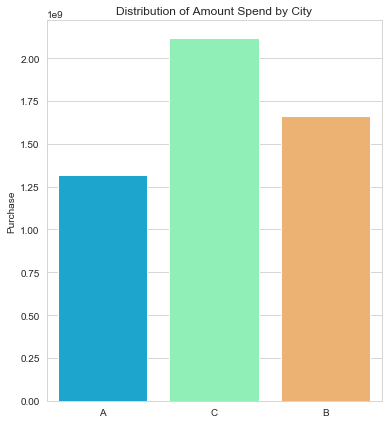

In [29]:
f, x = plt.subplots(figsize=(6,7))
sns.barplot(y=df.groupby(by=df['City_Category'])['Purchase'].agg(np.sum),  palette='rainbow',
          alpha=1, x=df['City_Category'].unique()).set_title('Distribution of Amount Spend by City')


In [184]:
a= df.groupby(by=['City_Category','Gender'], as_index=False)['Purchase'].agg(np.sum)
a

,City_Category,Gender,Purchase
0,A,F,306329915
1,A,M,1010141746
2,B,F,493617008
3,B,M,1621916597
4,C,F,386285719
5,C,M,1277521757


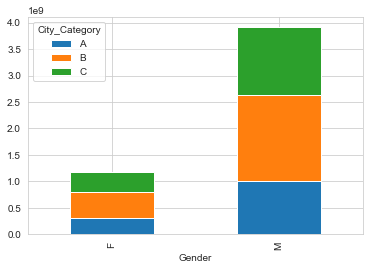

In [211]:
a.pivot(index='Gender', columns='City_Category', values='Purchase').plot(kind='bar', stacked=True);

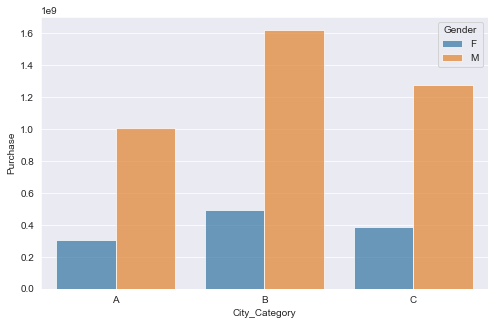

In [240]:
f, x1 = plt.subplots(figsize=(8,5))
sns.set_style('darkgrid')
sns.barplot(y= a.Purchase, x=a.City_Category, hue=a.Gender, alpha=0.7, ax=x1);
plt.setp(x1.artists, edgecolor = 'grey', facecolor='black');

In [ ]:
g = sns.FacetGrid(a, hue="Gender", height= 6 ,aspect=2,palette='hot')
g.map(plt.bar,'Purchase', 'City_Category', alpha=0.7,edgecolor='grey')

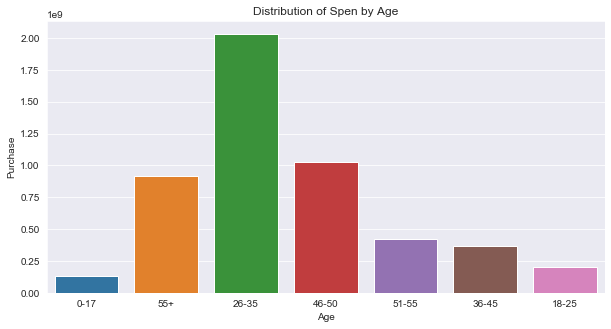

In [26]:
#df.groupby('Age')['Purchase'].agg(np.sum).plot(kind='bar')
sns.set_style('darkgrid')
fg, ax2 = plt.subplots(figsize=(10,5))
sns.barplot(y=df.groupby('Age')['Purchase'].agg(np.sum), x=df['Age'].unique()).set_title('Distribution of Spen by Age');
#plt.ticklabel_format(style='plain', axis='y')
ax2.set(xlabel='Age');

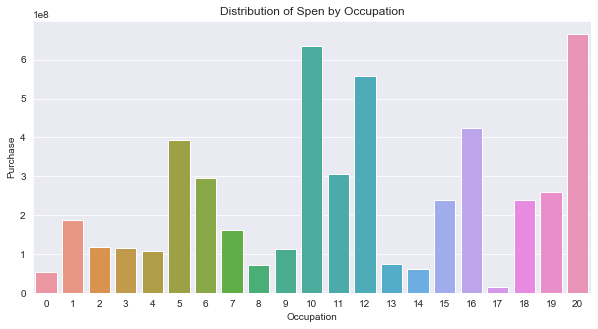

In [28]:
fg, ax2 = plt.subplots(figsize=(10,5))
sns.barplot(y=df.groupby('Occupation')['Purchase'].agg(np.sum), x=df['Occupation'].unique()).set_title('Distribution of Spen by Occupation');
#plt.ticklabel_format(style='plain', axis='y')
ax2.set(xlabel='Occupation');

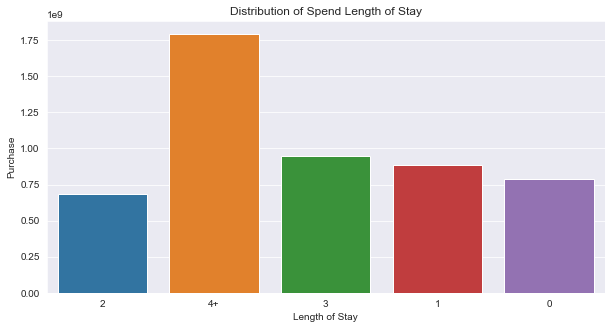

In [30]:
fg, ax3 = plt.subplots(figsize=(10,5))
sns.barplot(y=df.groupby('Stay_In_Current_City_Years')['Purchase'].agg(np.sum), x=df['Stay_In_Current_City_Years'].unique()).set_title('Distribution of Spend Length of Stay');
#plt.ticklabel_format(style='plain', axis='y')
ax3.set(xlabel='Length of Stay');

In [5]:
b = df.groupby(['City_Category', 'Stay_In_Current_City_Years'], as_index=False)['Purchase'].agg(np.sum)

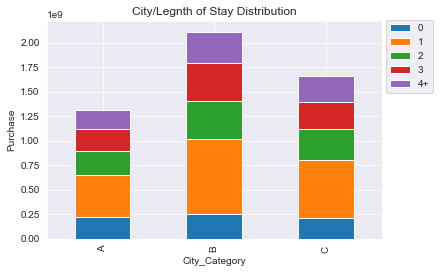

In [28]:
#fig, axx = plt.subplots()
sns.set_style('darkgrid')
b.pivot(index='City_Category', columns='Stay_In_Current_City_Years', values='Purchase').plot(kind='bar', stacked=True).set_title('City/Legnth of Stay Distribution');
#.plot(kind='bar', stacked=True)
axx = plt.gca()
plt.legend(bbox_to_anchor=(1.17, 1.03))#, bbox_transform=axx.transAxes)
axx.set(ylabel='Purchase');

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Mar Status

In [16]:
#sns.barplot(y=df['Marital_Status'].value_counts(normalize=True).mul(100), x='')
df['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

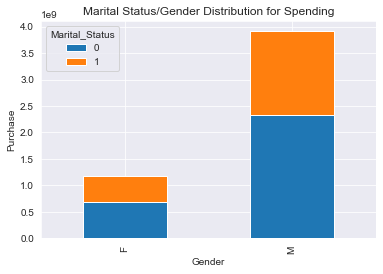

In [55]:
df.groupby(['Marital_Status', 'Gender'], as_index=False)['Purchase'].agg(np.sum)\
.pivot(index='Gender', columns='Marital_Status', values='Purchase')\
.plot(kind='bar', stacked=True)
xx = plt.gca()
xx.set(ylabel='Purchase');
xx.set(title='Marital Status/Gender Distribution for Spending');

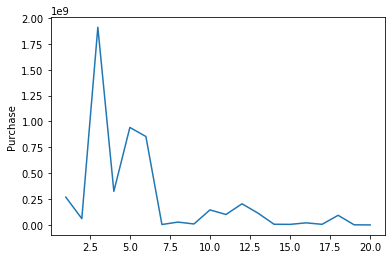

In [23]:
sns.lineplot(x=df['Product_Category_1'].unique(), y = df.groupby(['Product_Category_1'])['Purchase'].agg(np.sum))

In [39]:
pc = df.groupby(['Product_Category_1', 'Gender'], as_index=False)['Purchase'].agg(np.sum).pivot(columns='Gender', 
                                                                                          index='Product_Category_1',
                                                                                          values='Purchase')

In [78]:
pc.M

Product_Category_1
1     1572382609
2      203972569
3      142447197
4       18447282
5      677177151
6      253046186
7       45436384
8      602636323
9        5269622
10      77955108
11      91629789
12       3151947
13       2935717
14      11450089
15      77597730
16     109855670
17       5268222
18       8202033
19         42386
20        676086
Name: M, dtype: int64

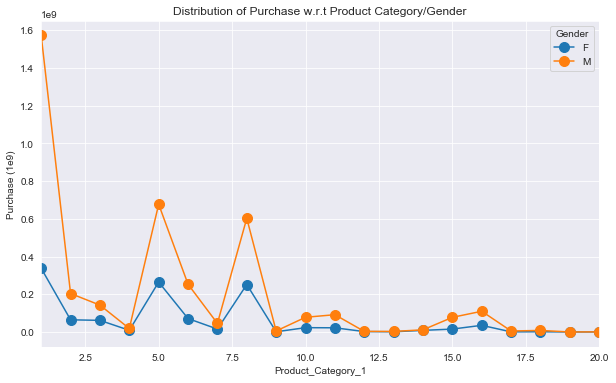

In [128]:
sns.set_style('darkgrid')
#use this to specify custom colours blue-red = color='br'
pc.plot(figsize=(10,6),marker='o', markersize=10)\
.set(title='Distribution of Purchase w.r.t Product Category/Gender',
    ylabel='Purchase (1e9)');

### Correlation Between Features

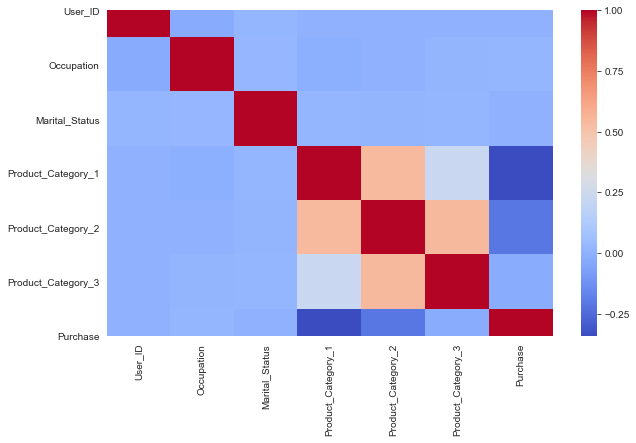

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Preprocessing

encode the categorical columns and scale numerical ones. 


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
le = LabelEncoder()

#df.apply(le.fit_transform)

In [4]:
#df.select_dtypes('int64')
# #df.info()
# num_col_ = ['int64', 'float64']
# num_cols = df.select_dtypes(num_col).columns
# cat_cols = df.select_dtypes('object').columns
# print(num_cols, "\n", cat_cols)

num_cols = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
cat_cols = ['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']

In [5]:
df1 = df[cat_cols].fillna(0)#.apply(le.fit_transform)
dft = dftest[cat_cols].fillna(0)#.apply(le.fit_transform)


for col in cat_cols: 
    df1[col] = le.fit_transform(df1[col])
    dft[col] = le.fit_transform(dft[col])

df1[num_cols] = df[num_cols].fillna(0)
dft[num_cols] = dftest[num_cols].fillna(0)

# User_ID 

df1['User_ID']=df['User_ID']-1000000
dft['User_ID']= dftest['User_ID']-1000000

In [6]:
scal_col = ['Product_ID',
 'Age',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [7]:
scaler.fit_transform(df1[col].values.reshape(-1,1))

array([[0.10980142],
       [0.10980142],
       [0.10980142],
       ...,
       [1.66086068],
       [0.10980142],
       [1.66086068]])

In [8]:
# df1[scal_col]=scaler.fit_transform(df1[scal_col])
# dft[scal_col]=scaler.fit_transform(dft[scal_col])

for col in scal_col:
    df1[col] = scaler.fit_transform(df1[col].values.reshape(-1,1))
    dft[col] = scaler.fit_transform(dft[col].values.reshape(-1,1))
    

df1['Purchase'] = df['Purchase']
df1 = df1[df.columns]
dft = dft[dftest.columns]

In [30]:
#df1 = df.fillna(0).apply(le.fit_transform)

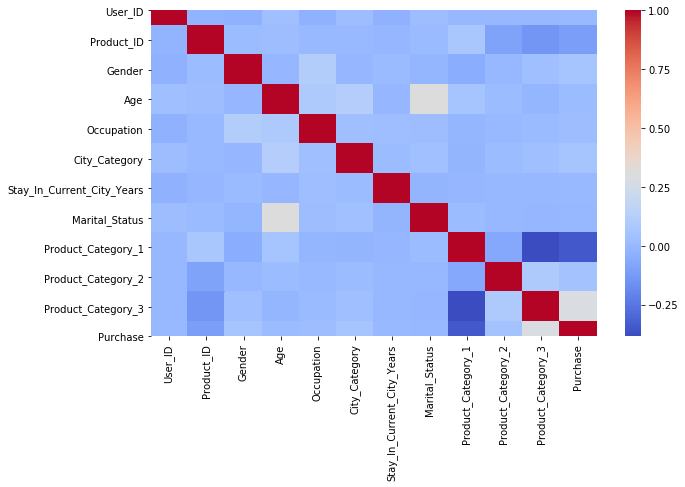

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),cmap='coolwarm');

In [53]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# df1 = scaler.fit_transform(df1.drop(columns=['Purchase'], axis=1))
# df1 = pd.DataFrame(df1, columns=df.columns[:-1])
# df1['Purchase'] = df['Purchase']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,-1.749661,-1.022993,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-1.028778,-0.596607,8370
1,-1.749661,0.660469,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.178703,1.608729,15200
2,-1.749661,-0.845162,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,-1.028778,-0.596607,1422
3,-1.749661,-0.868873,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,1.181417,-0.596607,1057
4,-1.749068,1.014154,0.572570,2.588277,1.214734,1.259336,1.660861,-0.833018,0.659449,-1.028778,-0.596607,7969


## Build Model

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns='Purchase', axis=1),
                                                    df1['Purchase'], test_size=0.33, random_state=0, shuffle = True)

### Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

tune_param = {'alpha':[0.001, 0.05, 0.01, 1, 5, 10, 100, 1000, 15000]}
model_ridge = GridSearchCV(Ridge(), tune_param, scoring='neg_mean_absolute_error', cv=5)
model_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.05, 0.01, 1, 5, 10, 100, 1000,
                                   15000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [89]:
model_ridge.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
ridge_predict = model_ridge.predict(X_test)

In [91]:
print('Root Mean Square Error for Ridge Regression:\n')
print('RMSE: ', sqrt(mean_squared_error(y_test,ridge_predict)))

Root Mean Square Error for Ridge Regression:

RMSE:  4617.7184375812885


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor()
tune_param = {'n_estimators':[100,200,300,400,500], 'min_samples_split': [2,5,10], 'min_samples_leaf':[1,2,4]}

model_RF = RandomizedSearchCV(RandomForestRegressor(), tune_param, n_iter=20, verbose=2, 
                              scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
model_RF.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
moded_RF.best_estimator_

In [ ]:
RF_predict = model_RF.predict(X_test)

In [ ]:
print('Root Mean Square Error for Random Forest Regresor:\n')
print('RMSE: ', sqrt(mean_squared_error(y_test,RF_predict)))

### Gradient Boosting Regressor

In [47]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
gbrPred = gbr.predict(X_test)
gbrint = gbrPred.astype(int)

In [49]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from math import sqrt

rms = sqrt(mean_squared_error(y_test, gbrPred))

print('Max Error', max_error(y_test, gbrPred))
print('Mean Squared Error', mean_squared_error(y_test, gbrPred))
print('Root Mean Squared Error', rms)
print('Mean Absolute Error', mean_absolute_error(y_test, gbrPred))
print('r2 score', r2_score(y_test, gbrPred))


Max Error 14265.166345742331
Mean Squared Error 8490836.909604844
Root Mean Squared Error 2913.904066644069
Mean Absolute Error 2214.846395373788
r2 score 0.6643309661768748


In [50]:

rms = sqrt(mean_squared_error(y_test, gbrPred))
rms

2913.904066644069

### XGBRegressor 

In [10]:
from xgboost import XGBRegressor, DMatrix
xgbr = XGBRegressor()

In [52]:
xgbr.fit(X_train,y_train)
xgbrPred = xgbr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:44:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
xgb_rms = sqrt(mean_squared_error(y_test, xgbrPred))
xgb_rms

2913.9462684856057

In [54]:
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = sqrt(mean_squared_error(y_test, baseline_predictions))
print("Baseline RMSE is {:.2f}".format(mae_baseline))
print("XGBoost RMSE is {:.2f}".format(xgb_rms))

Baseline RMSE is 5029.47
XGBoost RMSE is 2913.95


### Now let's try to improve our base model with some hyper parameterization. 
#### we will not use GridSearchCV since it training set is large and it becomes computationally expensive. 
#### Instead we will tune parameters individually on the go. 

In [40]:
import xgboost as XGB

dtrain = XGB.DMatrix(X_train, label=y_train)
dtest = XGB.DMatrix(X_test, label=y_test)

In [41]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [42]:
params['eval_metric'] = "rmse"
num_boost_round = 999

In [27]:
model = XGB.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[14:11:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:6103.93
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:4605.23
[2]	Test-rmse:3648.17
[3]	Test-rmse:3068.27
[4]	Test-rmse:2727.93
[5]	Test-rmse:2545.65
[6]	Test-rmse:2441.78
[7]	Test-rmse:2390.3
[8]	Test-rmse:2353.93
[9]	Test-rmse:2337.85
[10]	Test-rmse:2322.06
[11]	Test-rmse:2312.19
[12]	Test-rmse:2302.85
[13]	Test-rmse:2297.89
[14]	Test-rmse:2290.79
[15]	Test-rmse:2285.15
[16]	Test-rmse:2280.65
[17]	Test-rmse:2276.29
[18]	Test-rmse:2274.22
[19]	Test-rmse:2271.48
[20]	Test-rmse:2267.68
[21]	Test-rmse:2263.91
[22]	Test-rmse:2260.92
[23]	Test-rmse:2258.59
[24]	Test-rmse:2252.42
[25]	Test-rmse:2250.48
[26]	Test-rmse:2248.09
[27]	Test-rmse:2246.75
[28]	Test-rmse:2244.08
[29]	Test-rmse:2241.98
[30]	Test-rmse:2239.58
[31]	Test-rmse:2238.41
[32]	Test-rmse:2236.99
[33]	Test-rmse:2234.87
[34]	Tes

[338]	Test-rmse:2072.36
[339]	Test-rmse:2072.34
[340]	Test-rmse:2072.36
[341]	Test-rmse:2072.35
[342]	Test-rmse:2072.1
[343]	Test-rmse:2071.99
[344]	Test-rmse:2071.82
[345]	Test-rmse:2071.81
[346]	Test-rmse:2071.56
[347]	Test-rmse:2071.41
[348]	Test-rmse:2071.3
[349]	Test-rmse:2071.2
[350]	Test-rmse:2071.25
[351]	Test-rmse:2071.25
[352]	Test-rmse:2071.24
[353]	Test-rmse:2071.21
[354]	Test-rmse:2070.88
[355]	Test-rmse:2070.83
[356]	Test-rmse:2070.72
[357]	Test-rmse:2070.47
[358]	Test-rmse:2070.23
[359]	Test-rmse:2069.82
[360]	Test-rmse:2069.84
[361]	Test-rmse:2069.78
[362]	Test-rmse:2069.64
[363]	Test-rmse:2069.26
[364]	Test-rmse:2069.08
[365]	Test-rmse:2068.66
[366]	Test-rmse:2068.68
[367]	Test-rmse:2068.4
[368]	Test-rmse:2068.18
[369]	Test-rmse:2068.12
[370]	Test-rmse:2068.17
[371]	Test-rmse:2068
[372]	Test-rmse:2067.99
[373]	Test-rmse:2067.9
[374]	Test-rmse:2067.82
[375]	Test-rmse:2067.65
[376]	Test-rmse:2067.33
[377]	Test-rmse:2067.31
[378]	Test-rmse:2067.15
[379]	Test-rmse:2067.02


In [29]:
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 2051.00 with 624 rounds


It shows we have achieved much lower RMSE of 2051 (compared to 2387) with just some basic parameter tuning and optimal number of boositng rounds (or number of trees to build). 

We will now try to imporve this model by further tuning the parameters. 

### Using XGBoost CV - Cross Validation

In [18]:
cv_results = XGB.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

KeyboardInterrupt: 

In [31]:
cv_results['test-rmse-mean'].min()

2075.2893554

### Tuning max_depth and min_child_weight

In [43]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(8,12,2)
    for min_child_weight in range(4,10,3)
]

In [55]:
gridsearch_params
params

{'max_depth': 8,
 'min_child_weight': 4,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

In [56]:
# import warnings
# warnings.filterwarnings('ignore')
# ! python -W ignore::DeprecationWarning


In [57]:
min_rmse = float("Inf")
best_param = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = XGB.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=3
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].values.argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
        
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))


CV with max_depth=8, min_child_weight=4
	RMSE 2565.037109333333 for 207 rounds
CV with max_depth=8, min_child_weight=7
	RMSE 2563.135579333333 for 184 rounds
CV with max_depth=10, min_child_weight=4
	RMSE 2583.1003419999997 for 69 rounds
CV with max_depth=10, min_child_weight=7
	RMSE 2574.6959636666666 for 100 rounds
Best params: 8, 7, RMSE: 2563.135579333333


In [58]:
params['max_depth'] =8
params['min_child_weight']=7
params

{'max_depth': 8,
 'min_child_weight': 7,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

#### We can also tune Parameters subsample and colsample_bytree. However will skip that for now since takes a lot of time

In [60]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = XGB.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=5
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].values.argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	MAE 2560.0147300000003 for 241 rounds
CV with subsample=1.0, colsample=0.9
	MAE 2552.631185 for 263 rounds
CV with subsample=1.0, colsample=0.8
	MAE 2554.6656086666667 for 233 rounds
CV with subsample=1.0, colsample=0.7
	MAE 2554.184896 for 278 rounds
CV with subsample=0.9, colsample=1.0
	MAE 2566.619303666667 for 214 rounds
CV with subsample=0.9, colsample=0.9
	MAE 2561.329427333333 for 199 rounds
CV with subsample=0.9, colsample=0.8
	MAE 2562.657145 for 234 rounds
CV with subsample=0.9, colsample=0.7
	MAE 2561.179118 for 245 rounds
CV with subsample=0.8, colsample=1.0
	MAE 2572.3976236666667 for 182 rounds
CV with subsample=0.8, colsample=0.9
	MAE 2568.4898273333333 for 223 rounds
CV with subsample=0.8, colsample=0.8
	MAE 2571.650635 for 232 rounds
CV with subsample=0.8, colsample=0.7
	MAE 2566.536539666667 for 255 rounds
CV with subsample=0.7, colsample=1.0
	MAE 2587.746826 for 151 rounds
CV with subsample=0.7, colsample=0.9
	MAE 2576.9476726666

In [61]:
params['subsample'] = 1.0
params['colsample'] = 0.9
params

{'max_depth': 8,
 'min_child_weight': 7,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'colsample': 0.9}

### Tuning Learning Rate 'ETA'

In [62]:
%time
min_rmse = float("Inf")
best_params = None

for et in [.1, .05, .01, .005]:
    print('CV with eta= {}'.format(et))
    
    # update our parameters
    params['eta'] = et
    
    #Run and time CV
    
    %time cv_results = XGB.cv(params, dtrain, num_boost_round=num_boost_round,\
                              seed=42,nfold=3, metrics=['rmse'],\
                              early_stopping_rounds=5)
    # update best score
    
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].values.argmin()
    
    print('\tRMSE {} for {} rounds\n'.format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = et
        
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

Wall time: 0 ns
CV with eta= 0.1
Wall time: 21min 14s
	RMSE 2530.7267253333334 for 913 rounds

CV with eta= 0.05
Wall time: 24min 46s
	RMSE 2549.9804686666666 for 998 rounds

CV with eta= 0.01
Wall time: 24min 34s
	RMSE 2663.5264483333335 for 998 rounds

CV with eta= 0.005
Wall time: 26min
	RMSE 2731.9678550000003 for 998 rounds

Best params: 0.1, MAE: 2530.7267253333334


In [64]:
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

Best params: 0.1, RMSE: 2530.7267253333334


#### Lower the value of learning rate, longer it takes to converge hence each iteration takes a further longer step. 
#### for quick analyses we can use XGBRegressor (without CV) with already optimal hyperparameters to find optimal eta

In [65]:

# xgb_rms = []
# ets = [.1, .05, .01, .005]
# for et in ets:
#     print('CV with eta= {}'.format(et))
    
#     xgbr = XGB.XGBRegressor(learning_rate=et, max_depth=8, min_child_weight=7)
#     xgbr.fit(X_train, y_train)
#     xPr = xgbr.predict(X_test)
#     xgb_rms.append(sqrt(mean_squared_error(y_test, xPr)))
#     print('\tRMSE for eta={} is {}'.format(et,sqrt(mean_squared_error(y_test, xPr))))


In [66]:
# val, idx = min((val, idx) for (idx, val) in enumerate(xgb_rms))
# print('Best value of eta {} gives RMSE={}'.format(ets[idx], val))

In [67]:
#update the params
params['eta']=  0.1
params

{'max_depth': 8,
 'min_child_weight': 7,
 'eta': 0.1,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'colsample': 0.9}

### Lets train the model with these tune parameters and see how well it does

In [68]:
model = XGB.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=5
)

[0]	Test-rmse:9690.49
Will train until Test-rmse hasn't improved in 5 rounds.
[1]	Test-rmse:8819.21
[2]	Test-rmse:8042.64
[3]	Test-rmse:7422.73
[4]	Test-rmse:6803.13
[5]	Test-rmse:6256.39
[6]	Test-rmse:5775.89
[7]	Test-rmse:5354.1
[8]	Test-rmse:4986.75
[9]	Test-rmse:4655.5
[10]	Test-rmse:4419.81
[11]	Test-rmse:4162.45
[12]	Test-rmse:3943.12
[13]	Test-rmse:3798.75
[14]	Test-rmse:3630.5
[15]	Test-rmse:3509.08
[16]	Test-rmse:3384.07
[17]	Test-rmse:3277.03
[18]	Test-rmse:3189.29
[19]	Test-rmse:3120.13
[20]	Test-rmse:3076.98
[21]	Test-rmse:3026.95
[22]	Test-rmse:2981
[23]	Test-rmse:2949.16
[24]	Test-rmse:2922.89
[25]	Test-rmse:2899.93
[26]	Test-rmse:2874.2
[27]	Test-rmse:2858.83
[28]	Test-rmse:2848.19
[29]	Test-rmse:2832.6
[30]	Test-rmse:2821.61
[31]	Test-rmse:2806.72
[32]	Test-rmse:2799.1
[33]	Test-rmse:2789.91
[34]	Test-rmse:2782.89
[35]	Test-rmse:2777.61
[36]	Test-rmse:2772.92
[37]	Test-rmse:2763.78
[38]	Test-rmse:2757.31
[39]	Test-rmse:2751.92
[40]	Test-rmse:2747.46
[41]	Test-rmse:2744.

[346]	Test-rmse:2541.09
[347]	Test-rmse:2540.89
[348]	Test-rmse:2540.61
[349]	Test-rmse:2540.28
[350]	Test-rmse:2540.04
[351]	Test-rmse:2539.99
[352]	Test-rmse:2539.81
[353]	Test-rmse:2539.73
[354]	Test-rmse:2539.58
[355]	Test-rmse:2539.04
[356]	Test-rmse:2538.89
[357]	Test-rmse:2538.85
[358]	Test-rmse:2538.74
[359]	Test-rmse:2538.71
[360]	Test-rmse:2538.58
[361]	Test-rmse:2538.42
[362]	Test-rmse:2538.35
[363]	Test-rmse:2538.31
[364]	Test-rmse:2538.12
[365]	Test-rmse:2537.93
[366]	Test-rmse:2537.86
[367]	Test-rmse:2537.8
[368]	Test-rmse:2537.71
[369]	Test-rmse:2537.54
[370]	Test-rmse:2537.47
[371]	Test-rmse:2537.43
[372]	Test-rmse:2537.29
[373]	Test-rmse:2537.09
[374]	Test-rmse:2536.86
[375]	Test-rmse:2536.78
[376]	Test-rmse:2536.67
[377]	Test-rmse:2536.62
[378]	Test-rmse:2536.32
[379]	Test-rmse:2535.98
[380]	Test-rmse:2535.82
[381]	Test-rmse:2535.74
[382]	Test-rmse:2535.65
[383]	Test-rmse:2535.35
[384]	Test-rmse:2535.29
[385]	Test-rmse:2535.25
[386]	Test-rmse:2535.1
[387]	Test-rmse:25

[689]	Test-rmse:2506.06
[690]	Test-rmse:2505.95
[691]	Test-rmse:2505.82
[692]	Test-rmse:2505.76
[693]	Test-rmse:2505.67
[694]	Test-rmse:2505.56
[695]	Test-rmse:2505.49
[696]	Test-rmse:2505.51
[697]	Test-rmse:2505.5
[698]	Test-rmse:2505.37
[699]	Test-rmse:2505.3
[700]	Test-rmse:2505.25
[701]	Test-rmse:2505.16
[702]	Test-rmse:2505.16
[703]	Test-rmse:2505.16
[704]	Test-rmse:2505.18
[705]	Test-rmse:2505.1
[706]	Test-rmse:2505.01
[707]	Test-rmse:2504.97
[708]	Test-rmse:2504.85
[709]	Test-rmse:2504.75
[710]	Test-rmse:2504.63
[711]	Test-rmse:2504.57
[712]	Test-rmse:2504.5
[713]	Test-rmse:2504.5
[714]	Test-rmse:2504.4
[715]	Test-rmse:2504.31
[716]	Test-rmse:2504.23
[717]	Test-rmse:2504.06
[718]	Test-rmse:2503.95
[719]	Test-rmse:2503.95
[720]	Test-rmse:2503.97
[721]	Test-rmse:2503.96
[722]	Test-rmse:2503.84
[723]	Test-rmse:2503.81
[724]	Test-rmse:2503.75
[725]	Test-rmse:2503.72
[726]	Test-rmse:2503.62
[727]	Test-rmse:2503.49
[728]	Test-rmse:2503.38
[729]	Test-rmse:2503.3
[730]	Test-rmse:2503.26

In [69]:
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 2502.04 in 747 rounds


#### Since we have trained the model with more itration then required, we will now re-train the model with these learned parameters (including best_iteration) to see how well it does on the test set. This time we will remove the early stopping_rounds

In [70]:
#model.best_iteration
num_boost_round = 747+1

model = XGB.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],

)

[0]	Test-rmse:9690.49
[1]	Test-rmse:8819.21
[2]	Test-rmse:8042.64
[3]	Test-rmse:7422.73
[4]	Test-rmse:6803.13
[5]	Test-rmse:6256.39
[6]	Test-rmse:5775.89
[7]	Test-rmse:5354.1
[8]	Test-rmse:4986.75
[9]	Test-rmse:4655.5
[10]	Test-rmse:4419.81
[11]	Test-rmse:4162.45
[12]	Test-rmse:3943.12
[13]	Test-rmse:3798.75
[14]	Test-rmse:3630.5
[15]	Test-rmse:3509.08
[16]	Test-rmse:3384.07
[17]	Test-rmse:3277.03
[18]	Test-rmse:3189.29
[19]	Test-rmse:3120.13
[20]	Test-rmse:3076.98
[21]	Test-rmse:3026.95
[22]	Test-rmse:2981
[23]	Test-rmse:2949.16
[24]	Test-rmse:2922.89
[25]	Test-rmse:2899.93
[26]	Test-rmse:2874.2
[27]	Test-rmse:2858.83
[28]	Test-rmse:2848.19
[29]	Test-rmse:2832.6
[30]	Test-rmse:2821.61
[31]	Test-rmse:2806.72
[32]	Test-rmse:2799.1
[33]	Test-rmse:2789.91
[34]	Test-rmse:2782.89
[35]	Test-rmse:2777.61
[36]	Test-rmse:2772.92
[37]	Test-rmse:2763.78
[38]	Test-rmse:2757.31
[39]	Test-rmse:2751.92
[40]	Test-rmse:2747.46
[41]	Test-rmse:2744.29
[42]	Test-rmse:2740.91
[43]	Test-rmse:2735.99
[44]	Te

[348]	Test-rmse:2540.61
[349]	Test-rmse:2540.28
[350]	Test-rmse:2540.04
[351]	Test-rmse:2539.99
[352]	Test-rmse:2539.81
[353]	Test-rmse:2539.73
[354]	Test-rmse:2539.58
[355]	Test-rmse:2539.04
[356]	Test-rmse:2538.89
[357]	Test-rmse:2538.85
[358]	Test-rmse:2538.74
[359]	Test-rmse:2538.71
[360]	Test-rmse:2538.58
[361]	Test-rmse:2538.42
[362]	Test-rmse:2538.35
[363]	Test-rmse:2538.31
[364]	Test-rmse:2538.12
[365]	Test-rmse:2537.93
[366]	Test-rmse:2537.86
[367]	Test-rmse:2537.8
[368]	Test-rmse:2537.71
[369]	Test-rmse:2537.54
[370]	Test-rmse:2537.47
[371]	Test-rmse:2537.43
[372]	Test-rmse:2537.29
[373]	Test-rmse:2537.09
[374]	Test-rmse:2536.86
[375]	Test-rmse:2536.78
[376]	Test-rmse:2536.67
[377]	Test-rmse:2536.62
[378]	Test-rmse:2536.32
[379]	Test-rmse:2535.98
[380]	Test-rmse:2535.82
[381]	Test-rmse:2535.74
[382]	Test-rmse:2535.65
[383]	Test-rmse:2535.35
[384]	Test-rmse:2535.29
[385]	Test-rmse:2535.25
[386]	Test-rmse:2535.1
[387]	Test-rmse:2534.91
[388]	Test-rmse:2534.89
[389]	Test-rmse:25

[691]	Test-rmse:2505.82
[692]	Test-rmse:2505.76
[693]	Test-rmse:2505.67
[694]	Test-rmse:2505.56
[695]	Test-rmse:2505.49
[696]	Test-rmse:2505.51
[697]	Test-rmse:2505.5
[698]	Test-rmse:2505.37
[699]	Test-rmse:2505.3
[700]	Test-rmse:2505.25
[701]	Test-rmse:2505.16
[702]	Test-rmse:2505.16
[703]	Test-rmse:2505.16
[704]	Test-rmse:2505.18
[705]	Test-rmse:2505.1
[706]	Test-rmse:2505.01
[707]	Test-rmse:2504.97
[708]	Test-rmse:2504.85
[709]	Test-rmse:2504.75
[710]	Test-rmse:2504.63
[711]	Test-rmse:2504.57
[712]	Test-rmse:2504.5
[713]	Test-rmse:2504.5
[714]	Test-rmse:2504.4
[715]	Test-rmse:2504.31
[716]	Test-rmse:2504.23
[717]	Test-rmse:2504.06
[718]	Test-rmse:2503.95
[719]	Test-rmse:2503.95
[720]	Test-rmse:2503.97
[721]	Test-rmse:2503.96
[722]	Test-rmse:2503.84
[723]	Test-rmse:2503.81
[724]	Test-rmse:2503.75
[725]	Test-rmse:2503.72
[726]	Test-rmse:2503.62
[727]	Test-rmse:2503.49
[728]	Test-rmse:2503.38
[729]	Test-rmse:2503.3
[730]	Test-rmse:2503.26
[731]	Test-rmse:2503.26
[732]	Test-rmse:2503.23

#### Make prediction with the trained model

In [71]:
sqrt(mean_squared_error(model.predict(dtest),y_test))

2502.150610094358

We can see the score has improved quite a lot from our inital un-parameterized model.
It improved to 2502 from 2913. And it's a lot better from just the dummy model that always predict mean (5029 RMSE)

### Finally, we will now use the trained model on our test data set. 

In [72]:
DMatrix_test = XGB.DMatrix(dft)


In [73]:
prediction = model.predict(DMatrix_test)

In [74]:
Final_Predictions = pd.DataFrame(data=prediction).join(dftest[['User_ID','Product_ID']]).rename(columns={0:'Purchase'})

In [75]:
Final_Predictions.head()

,Purchase,User_ID,Product_ID
0,11106.656250,1000004,P00128942
1,10098.951172,1000009,P00113442
2,7344.499512,1000010,P00288442
3,3043.796631,1000010,P00145342
4,2168.760010,1000011,P00053842


In [99]:
# Final_Predictions['Comb'] = Final_Predictions['User_ID'].astype(str)+Final_Predictions['Product_ID'].astype(str)

In [100]:
# Final_Predictions = Final_Predictions[['Comb', 'Purchase']]
# Final_Predictions.set_index('Comb')

In [76]:
Final_Predictions = Final_Predictions[['User_ID', 'Product_ID', 'Purchase']]
Final_Predictions.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,11106.656250
1,1000009,P00113442,10098.951172
2,1000010,P00288442,7344.499512
3,1000010,P00145342,3043.796631
4,1000011,P00053842,2168.760010


In [77]:
Final_Predictions.to_csv('Final_Predictions.csv',index=False)

This gives public LB score of 3102. 

### Train XGBRegressor using the tunned parameters

In [23]:
xgbr = XGBRegressor(max_depth= 8, n_estimators=748, min_child_weight= 7, learning_rate = 0.1, subsample= 1.0,
                    colsample_bytree = 0.7, objective= 'reg:squarederror', eval_metric= 'rmse',
                    colsample = 0.9)

xgbr.fit(X_train.drop(columns='User_ID',axis=1),y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample=0.9,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=None, n_estimators=748, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1.0, verbosity=1)

In [25]:
xgbr_predict = xgbr.predict(X_test.drop(columns='User_ID', axis=1))
print('RMSE for tunned XGBoost', sqrt(mean_squared_error(y_test, xgbr_predict)))

RMSE for tunned XGBoost 2582.863705060495


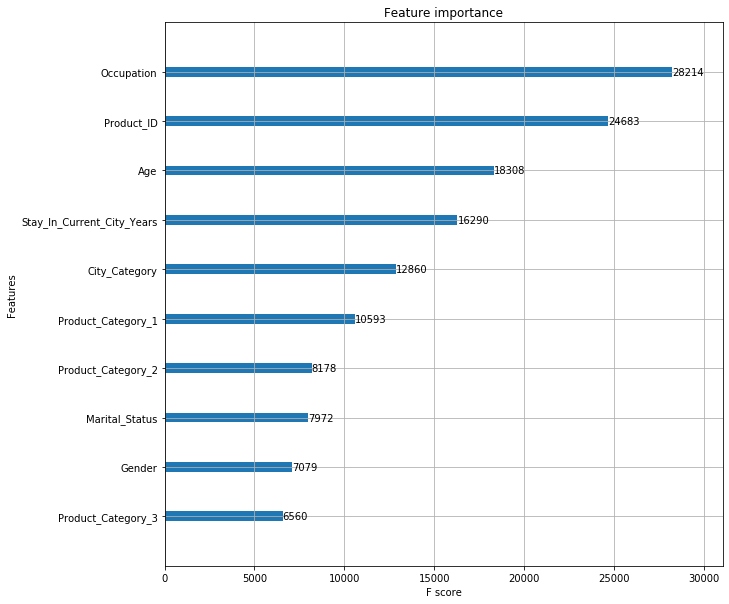

In [36]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1, figsize=(10,10))
plot_importance(booster=xgbr, ax=ax)

In [29]:
xgbr.fit(df1.drop(columns=['User_ID', 'Purchase'],axis=1),df1['Purchase'])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample=0.9,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=None, n_estimators=748, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1.0, verbosity=1)

In [31]:
xgb_finalPred = xgbr.predict(dft.drop(columns='User_ID', axis=1))

In [34]:
FP = pd.DataFrame(data=xgb_finalPred).join(dftest[['User_ID','Product_ID']]).rename(columns={0:'Purchase'})
FP = FP[['User_ID', 'Product_ID', 'Purchase']]
FP.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,12106.875000
1,1000009,P00113442,11524.942383
2,1000010,P00288442,7259.208008
3,1000010,P00145342,2485.493164
4,1000011,P00053842,2899.240234


In [35]:
FP.to_csv('FP.csv',index=False)

#### With Regularization applied

In [104]:
params['reg_lambda'] = 1500
params

{'max_depth': 6,
 'min_child_weight': 1,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'reg_lambda': 1500}

In [105]:
num_boost_round = 478

model = XGB.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=3
)

[0]	Test-rmse:7848.23
Will train until Test-rmse hasn't improved in 3 rounds.
[1]	Test-rmse:6035.45
[2]	Test-rmse:4866.97
[3]	Test-rmse:4142.06
[4]	Test-rmse:3682.82
[5]	Test-rmse:3373.94
[6]	Test-rmse:3205.81
[7]	Test-rmse:3083.31
[8]	Test-rmse:3014.64
[9]	Test-rmse:2981.79
[10]	Test-rmse:2958.51
[11]	Test-rmse:2928.32
[12]	Test-rmse:2913.2
[13]	Test-rmse:2902.67
[14]	Test-rmse:2896.34
[15]	Test-rmse:2886.06
[16]	Test-rmse:2878.32
[17]	Test-rmse:2868.76
[18]	Test-rmse:2862.23
[19]	Test-rmse:2857.9
[20]	Test-rmse:2853.72
[21]	Test-rmse:2850.74
[22]	Test-rmse:2844.09
[23]	Test-rmse:2837.4
[24]	Test-rmse:2833.94
[25]	Test-rmse:2831.84
[26]	Test-rmse:2828.01
[27]	Test-rmse:2826.67
[28]	Test-rmse:2822.13
[29]	Test-rmse:2817.36
[30]	Test-rmse:2813.89
[31]	Test-rmse:2811.91
[32]	Test-rmse:2809.17
[33]	Test-rmse:2805.32
[34]	Test-rmse:2803.42
[35]	Test-rmse:2798.8
[36]	Test-rmse:2795.04
[37]	Test-rmse:2793.11
[38]	Test-rmse:2791.35
[39]	Test-rmse:2790.09
[40]	Test-rmse:2788.28
[41]	Test-rmse:

[346]	Test-rmse:2617.88
[347]	Test-rmse:2617.75
[348]	Test-rmse:2617.59
[349]	Test-rmse:2617.18
[350]	Test-rmse:2616.96
[351]	Test-rmse:2616.7
[352]	Test-rmse:2616.35
[353]	Test-rmse:2616.21
[354]	Test-rmse:2615.97
[355]	Test-rmse:2615.87
[356]	Test-rmse:2615.73
[357]	Test-rmse:2615.67
[358]	Test-rmse:2615.55
[359]	Test-rmse:2615.32
[360]	Test-rmse:2614.96
[361]	Test-rmse:2614.61
[362]	Test-rmse:2614.44
[363]	Test-rmse:2614.27
[364]	Test-rmse:2614.12
[365]	Test-rmse:2614.05
[366]	Test-rmse:2613.84
[367]	Test-rmse:2613.46
[368]	Test-rmse:2613.21
[369]	Test-rmse:2612.8
[370]	Test-rmse:2612.06
[371]	Test-rmse:2611.9
[372]	Test-rmse:2611.58
[373]	Test-rmse:2611.41
[374]	Test-rmse:2611.22
[375]	Test-rmse:2610.94
[376]	Test-rmse:2610.53
[377]	Test-rmse:2610.41
[378]	Test-rmse:2610.25
[379]	Test-rmse:2610.1
[380]	Test-rmse:2609.95
[381]	Test-rmse:2609.17
[382]	Test-rmse:2608.98
[383]	Test-rmse:2608.77
[384]	Test-rmse:2608.45
[385]	Test-rmse:2608.37
[386]	Test-rmse:2608.08
[387]	Test-rmse:2607

In [106]:
prediction = model.predict(DMatrix_test)

In [107]:
Pred_Reg = pd.DataFrame(data=prediction).join(dftest[['User_ID','Product_ID']]).rename(columns={0:'Purchase'})

In [63]:
Pred_Reg = Pred_Reg[['User_ID', 'Product_ID', 'Purchase']]
Pred_Reg.to_csv('Pred_Reg.csv',index=False)

NameError: name 'Pred_Reg' is not defined

### Training Using GridSearchCV

In [ ]:
tune_params = {'max_depth' : [], 'learning_rate':[], 'n_estimators': [], 'reg_lambda':[],
              'min_child_weight' : [], }

grid = GridSearchCV(XGBRegressor(), tune_params, n_iter=20, scoring=, cv=5, )